# MKA-MLF, Lab_08 - RNN

Recurrent Neural Networks, are a class of artificial neural networks designed to recognize patterns in sequences of data, such as text, genomes, handwriting, or spoken words. Unlike traditional neural networks, which assume all inputs (and outputs) are independent of each other, RNNs are designed to recognize sequential or temporal patterns, making them especially suited for tasks like language modeling, speech recognition, and time series prediction.

## Exercise 1 - Time Series Forecasting

### 1.0 Import Libraries

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, SimpleRNN
from keras.models import Sequential
from keras.optimizers import Adam, legacy

### 1.1 Generating dataset

In [12]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [13]:
data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

### 1.2 Train/Valid/Test split

In [14]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [15]:
no_training_epochs = 5

### 1.3 Data examination

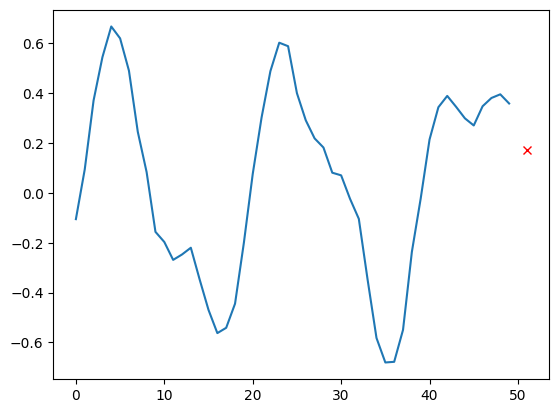

In [16]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

### 1.4 Simple Linear model

In [17]:
# Model definition
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(50,1)))
model_linear.add(Dense(1, activation = None))

In [18]:
# Model building

learning_rate = 0.001
optimizer = Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [19]:
model_linear.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Model training

history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 2s 3ms/step - loss: 0.1094 - mean_squared_error: 0.1094 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 2/5
219/219 [==============================] - 1s 2ms/step - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 3/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 4/5
219/219 [==============================] - 1s 2ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 5/5
219/219 [==============================] - 1s 2ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0073 - val_mean_squared_error: 0.0073


In [21]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

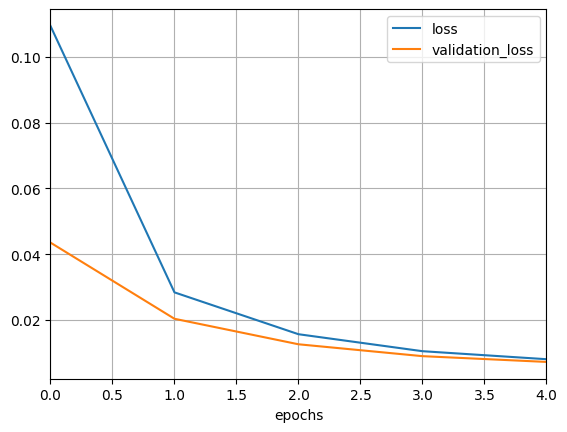

In [22]:
plot_function(history_linear)

In [23]:
score = model_linear.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.007530761882662773
Test MSE:  0.007530761882662773


### 1.5 Simple RNN Model

In [24]:
model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [25]:
learning_rate_simple_rnn = 0.001
optimizer_simple_rnn = Adam(learning_rate_simple_rnn)
model_simple_rnn.compile(loss='mean_squared_error', optimizer=optimizer_simple_rnn, metrics=['mean_squared_error'])

In [26]:
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 5s 20ms/step - loss: 0.6825 - mean_squared_error: 0.6825 - val_loss: 0.5651 - val_mean_squared_error: 0.5651
Epoch 2/5
219/219 [==============================] - 4s 19ms/step - loss: 0.3923 - mean_squared_error: 0.3923 - val_loss: 0.3676 - val_mean_squared_error: 0.3676
Epoch 3/5
219/219 [==============================] - 4s 20ms/step - loss: 0.3067 - mean_squared_error: 0.3067 - val_loss: 0.3053 - val_mean_squared_error: 0.3053
Epoch 4/5
219/219 [==============================] - 4s 20ms/step - loss: 0.2627 - mean_squared_error: 0.2627 - val_loss: 0.2649 - val_mean_squared_error: 0.2649
Epoch 5/5
219/219 [==============================] - 4s 19ms/step - loss: 0.2261 - mean_squared_error: 0.2261 - val_loss: 0.2261 - val_mean_squared_error: 0.2261


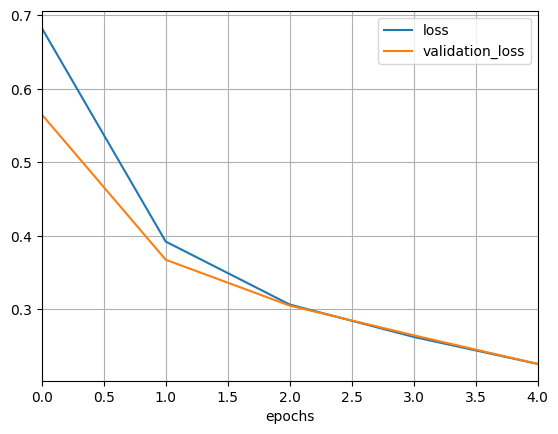

In [27]:
plot_function(history_simple_rnn)

### 1.5 Deep RNN Model

In [28]:
model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(20, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(SimpleRNN(20, return_sequences = True))
model_deep_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [29]:
learning_rate_deep_rnn = 0.001
optimizer_deep_rnn = Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])

In [30]:
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 23s 92ms/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 2/5
219/219 [==============================] - 20s 90ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 3/5
219/219 [==============================] - 20s 90ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 4/5
219/219 [==============================] - 20s 89ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 5/5
219/219 [==============================] - 20s 90ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


In [31]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.003342715557664633
Test MSE:  0.003342715557664633


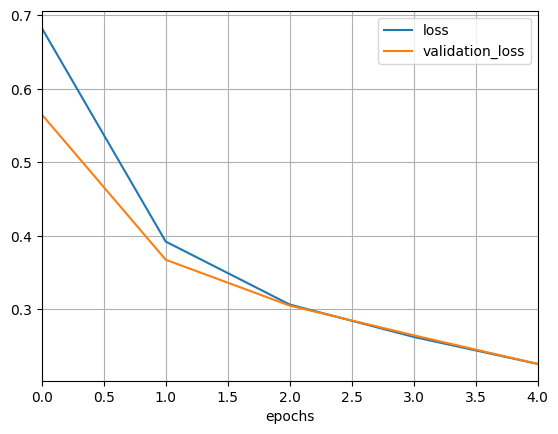

In [32]:
plot_function(history_simple_rnn)

## Exercise 2 - The movie review




Based on the written rewiev, classify if the movie if good or bad

### 2.0 - Import libraries

In [33]:
from keras.preprocessing.text import Tokenizer
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.optimizers import Adam

### 2.1 - Load dataset

In [34]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

17464789/17464789 [==============================] - 0s 0us/step


### 2.2 - Dataset examination

In [35]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

1641221/1641221 [==============================] - 0s 0us/step


In [36]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [37]:
single_sequence

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [38]:
max_length = 150  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [39]:
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.SimpleRNN(128, return_sequences=True),
    keras.layers.SimpleRNN(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])


In [40]:
optimizer = Adam(learning_rate = 0.001)

In [41]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [42]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 122s 191ms/step - loss: 0.7029 - accuracy: 0.4953 - val_loss: 0.6935 - val_accuracy: 0.5062
Epoch 2/5
625/625 [==============================] - 101s 162ms/step - loss: 0.6935 - accuracy: 0.5139 - val_loss: 0.6967 - val_accuracy: 0.4938
Epoch 3/5
625/625 [==============================] - 100s 160ms/step - loss: 0.6802 - accuracy: 0.5579 - val_loss: 0.6988 - val_accuracy: 0.5060
Epoch 4/5
625/625 [==============================] - 101s 161ms/step - loss: 0.6628 - accuracy: 0.5846 - val_loss: 0.7155 - val_accuracy: 0.5060
Epoch 5/5
625/625 [==============================] - 100s 159ms/step - loss: 0.6453 - accuracy: 0.6072 - val_loss: 0.7397 - val_accuracy: 0.5022


In [43]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.7415521144866943
Test accuracy:  49.67600107192993 %


TASK: Modify structure, change the core of the network from RNN to LTSM and GRU. Compare the results

## Use LSTM

In [57]:
legacy_optimizer = legacy.Adam(learning_rate)

In [58]:
model_lstm = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size, input_shape=[None]),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(128),
    keras.layers.Dense(1, activation='sigmoid')
])
model_lstm.compile(loss="binary_crossentropy", optimizer=legacy_optimizer, metrics=["accuracy"])

In [59]:
history_lstm = model_lstm.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 11s 14ms/step - loss: 0.6716 - accuracy: 0.5778 - val_loss: 0.6930 - val_accuracy: 0.4940
Epoch 2/5
625/625 [==============================] - 9s 14ms/step - loss: 0.6846 - accuracy: 0.5509 - val_loss: 0.6546 - val_accuracy: 0.6330
Epoch 3/5
625/625 [==============================] - 8s 13ms/step - loss: 0.6417 - accuracy: 0.6395 - val_loss: 0.6179 - val_accuracy: 0.6586
Epoch 4/5
625/625 [==============================] - 8s 13ms/step - loss: 0.5172 - accuracy: 0.7531 - val_loss: 0.4485 - val_accuracy: 0.7928
Epoch 5/5
625/625 [==============================] - 8s 13ms/step - loss: 0.4172 - accuracy: 0.8151 - val_loss: 0.4223 - val_accuracy: 0.8114


In [61]:
score_lstm = model_lstm.evaluate(X_test, y_test, verbose=0)
print('LSTM Test loss:', score_lstm[0])
print('LSTM Test accuracy:', score_lstm[1] * 100, "%")

LSTM Test loss: 0.4128820598125458
LSTM Test accuracy: 80.83999752998352 %


## Use GRU

In [62]:
model_gru = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size, input_shape=[None]),
    keras.layers.GRU(128, return_sequences=True),
    keras.layers.GRU(128),
    keras.layers.Dense(1, activation='sigmoid')
])
model_gru.compile(loss="binary_crossentropy", optimizer=legacy_optimizer, metrics=["accuracy"])

In [63]:
history_gru = model_gru.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 12s 15ms/step - loss: 0.6613 - accuracy: 0.5814 - val_loss: 0.6066 - val_accuracy: 0.6656
Epoch 2/5
625/625 [==============================] - 9s 14ms/step - loss: 0.4962 - accuracy: 0.7555 - val_loss: 0.4263 - val_accuracy: 0.8032
Epoch 3/5
625/625 [==============================] - 9s 14ms/step - loss: 0.3895 - accuracy: 0.8249 - val_loss: 0.4053 - val_accuracy: 0.8158
Epoch 4/5
625/625 [==============================] - 9s 14ms/step - loss: 0.3552 - accuracy: 0.8434 - val_loss: 0.4048 - val_accuracy: 0.8182
Epoch 5/5
625/625 [==============================] - 9s 14ms/step - loss: 0.3327 - accuracy: 0.8563 - val_loss: 0.3922 - val_accuracy: 0.8274


In [64]:
score_gru = model_gru.evaluate(X_test, y_test, verbose=0)
print('GRU Test loss:', score_gru[0])
print('GRU Test accuracy:', score_gru[1] * 100, "%")

GRU Test loss: 0.3710971772670746
GRU Test accuracy: 83.52400064468384 %


## Comparing results

In [65]:
print("SimpleRNN Test accuracy:", score[1] * 100, "%")
print("LSTM Test accuracy:", score_lstm[1] * 100, "%")
print("GRU Test accuracy:", score_gru[1] * 100, "%")

SimpleRNN Test accuracy: 49.67600107192993 %
LSTM Test accuracy: 80.83999752998352 %
GRU Test accuracy: 83.52400064468384 %
